<a href="https://colab.research.google.com/github/LongntLe/CS4780/blob/master/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Draw decision boundary

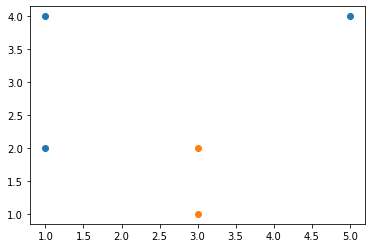

In [15]:
# Draw points of interest
# positive: (1,2), (1,4), (5,4)
# negative: (3,1), (3,2)

pos = [(1,2), (1,4), (5,4)]
x_pos = [x[0] for x in pos]
y_pos = [x[1] for x in pos]

neg = [(3,1), (3,2)]
x_neg = [x[0] for x in neg]
y_neg = [x[1] for x in neg]

plt.scatter(x_pos, y_pos)
plt.scatter(x_neg, y_neg)
plt.show()

In [62]:
x = np.linspace(0, 5.5, 1000)
y = np.linspace(0, 5.5, 1000)
xx, yy = np.meshgrid(x, y)

d = {}
for item in pos:
  d[item] = 1
for item in neg:
  d[item] = 0

def find_nearest_neighbor(x):
  global x_pos, y_pos, x_neg, y_neg, d

  all_x = np.array(x_pos + x_neg)
  all_y = np.array(y_pos + y_neg)
  
  idx = np.argmin ((all_x - x[0])**2 + (all_y - x[1])**2) # get index of min distance

  return d[(all_x[idx], all_y[idx])]

z = []
for item in list(zip(xx.ravel(), yy.ravel())): # get nearest_neighbor in meshgrid
  z.append(find_nearest_neighbor(item))

z = np.array(z)
z = z.reshape(xx.shape)

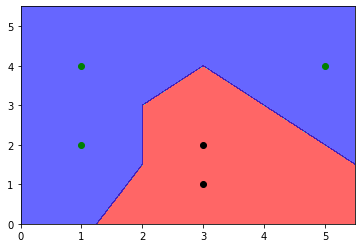

In [71]:
plt.contourf(xx, yy, z, colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan'), alpha = 0.6)
plt.scatter(x_pos, y_pos, c = 'green')
plt.scatter(x_neg, y_neg, c = 'black')
plt.show()

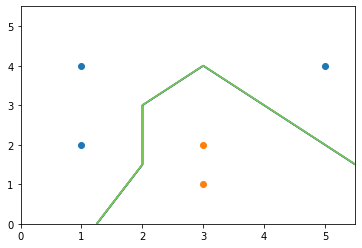

In [73]:
plt.contour(xx, yy, z, alpha = 0.6)
plt.scatter(x_pos, y_pos)
plt.scatter(x_neg, y_neg)
plt.show()

## Rescaling

* positive: (100, 2), (100, 4), (500, 4)
* negative: (300, 1), (300, 2)

(500, 1) to (500, 4) is closer than (500, 1) to (300, 2) so positive.

Problem: one feature might dominate in multi-feature classification.

Solution: Rescale all features to [0,1]

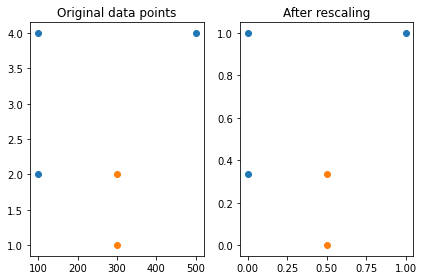

In [14]:
# positive: (100, 2), (100, 4), (500, 4)
# negative: (300, 1), (300, 2)

pos = [(100,2), (100,4), (500,4)]
x_pos = [x[0] for x in pos]
y_pos = [x[1] for x in pos]

neg = [(300,1), (300,2)]
x_neg = [x[0] for x in neg]
y_neg = [x[1] for x in neg]

# rescale
def rescale(arr, mn, mx):
  return list((np.array(arr)-mn)/ (mx-mn))

rscl_x_pos = rescale(x_pos, min(x_pos+x_neg), max(x_pos+x_neg))
rscl_y_pos = rescale(y_pos, min(y_pos+y_neg), max(y_pos+y_neg))
rscl_x_neg = rescale(x_neg, min(x_pos+x_neg), max(x_pos+x_neg))
rscl_y_neg = rescale(y_neg, min(y_pos+y_neg), max(y_pos+y_neg))

plt.subplot(1, 2, 1)
plt.scatter(x_pos, y_pos)
plt.scatter(x_neg, y_neg)
plt.title('Original data points')

plt.subplot(1, 2, 2)
plt.scatter(rscl_x_pos, rscl_y_pos)
plt.scatter(rscl_x_neg, rscl_y_neg)
plt.title('After rescaling')

plt.tight_layout()
plt.show()

In [15]:
d = {}
for item in zip(rscl_x_pos, rscl_y_pos):
  d[item] = 1
for item in zip(rscl_x_neg, rscl_y_neg):
  d[item] = 0

def find_nearest_neighbor(x):
  global rscl_x_pos, rscl_y_pos, rscl_x_neg, rscl_y_neg, d

  all_x = np.array(rscl_x_pos + rscl_x_neg)
  all_y = np.array(rscl_y_pos + rscl_y_neg)
  
  idx = np.argmin ((all_x - x[0])**2 + (all_y - x[1])**2) # get index of min distance

  return d[(all_x[idx], all_y[idx])]

# (500, 1) is rescaled to (1, 0)
find_nearest_neighbor((1, 0))

0

## K-NN Regression

Per 2-NN Euclidean distance, (0, 1) is closest to (0, 0) and (1, 1) and thus got labeled (1+2)/2=1.5

## Missing data points

We can truncate data points with missing values or extrapolate them depending on the situation.

## Training time

It takes more time to apply a k-NN classifier. Training = storing points. Applying = calculating distance between the test points and all training points.

## Curse of dimensionality and Image data

Image data could be compressed to certain important features only. For example, as seen in the lecture, only a handful of facial features are needed from facial images to classify faces. Therefore, we don't need a large number of features, thus dimensions, for k-NN.

Another way we could go about the curse of dimensionality in high-dimension data set, not exclusively for images, is dimensional reduction techniques like PCA.